# Field Analysis


In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)

## Load & Flatten Data


In [8]:
df = pd.read_csv("fields.csv")

/var/folders/k3/2dc5938n7tg5pf4_c8ph7qxw0000gn/T/ipykernel_29546/1355016397.py:1: DtypeWarning: Columns (140,141,142,143,144,145,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fields.csv")


In [9]:
df

,Unnamed: 0,hasResults,protocolSection.identificationModule.nctId,protocolSection.identificationModule.orgStudyIdInfo.id,protocolSection.identificationModule.organization.fullName,protocolSection.identificationModule.organization.class,protocolSection.identificationModule.briefTitle,protocolSection.identificationModule.officialTitle,protocolSection.statusModule.statusVerifiedDate,protocolSection.statusModule.overallStatus,protocolSection.statusModule.expandedAccessInfo.hasExpandedAccess,protocolSection.statusModule.startDateStruct.date,protocolSection.statusModule.startDateStruct.type,protocolSection.statusModule.primaryCompletionDateStruct.date,protocolSection.statusModule.primaryCompletionDateStruct.type,protocolSection.statusModule.completionDateStruct.date,protocolSection.statusModule.completionDateStruct.type,protocolSection.statusModule.studyFirstSubmitDate,protocolSection.statusModule.studyFirstSubmitQcDate,protocolSection.statusModule.studyFirstPostDateStruct.date,protocolSection.statusModule.studyFirstPostDateStruct.type,protocolSection.statusModule.lastUpdateSubmitDate,protocolSection.statusModule.lastUpdatePostDateStruct.date,protocolSection.statusModule.lastUpdatePostDateStruct.type,protocolSection.sponsorCollaboratorsModule.responsibleParty.type,protocolSection.sponsorCollaboratorsModule.responsibleParty.investigatorFullName,protocolSection.sponsorCollaboratorsModule.responsibleParty.investigatorTitle,protocolSection.sponsorCollaboratorsModule.responsibleParty.investigatorAffiliation,protocolSection.sponsorCollaboratorsModule.leadSponsor.name,protocolSection.sponsorCollaboratorsModule.leadSponsor.class,protocolSection.oversightModule.oversightHasDmc,protocolSection.descriptionModule.briefSummary,protocolSection.descriptionModule.detailedDescription,protocolSection.conditionsModule.conditions,protocolSection.designModule.studyType,protocolSection.designModule.patientRegistry,protocolSection.designModule.designInfo.observationalModel,protocolSection.designModule.designInfo.timePerspective,protocolSection.designModule.enrollmentInfo.count,protocolSection.designModule.enrollmentInfo.type,protocolSection.armsInterventionsModule.armGroups,protocolSection.armsInterventionsModule.interventions,protocolSection.outcomesModule.primaryOutcomes,protocolSection.outcomesModule.secondaryOutcomes,protocolSection.eligibilityModule.eligibilityCriteria,protocolSection.eligibilityModule.healthyVolunteers,protocolSection.eligibilityModule.sex,protocolSection.eligibilityModule.minimumAge,protocolSection.eligibilityModule.stdAges,protocolSection.eligibilityModule.studyPopulation,protocolSection.eligibilityModule.samplingMethod,protocolSection.contactsLocationsModule.overallOfficials,protocolSection.contactsLocationsModule.locations,protocolSection.ipdSharingStatementModule.ipdSharing,derivedSection.miscInfoModule.versionHolder,derivedSection.conditionBrowseModule.meshes,derivedSection.conditionBrowseModule.ancestors,derivedSection.conditionBrowseModule.browseLeaves,derivedSection.conditionBrowseModule.browseBranches,protocolSection.identificationModule.acronym,protocolSection.oversightModule.isFdaRegulatedDrug,protocolSection.oversightModule.isFdaRegulatedDevice,protocolSection.conditionsModule.keywords,protocolSection.designModule.phases,protocolSection.designModule.designInfo.allocation,protocolSection.designModule.designInfo.interventionModel,protocolSection.designModule.designInfo.primaryPurpose,protocolSection.designModule.designInfo.maskingInfo.masking,derivedSection.interventionBrowseModule.meshes,derivedSection.interventionBrowseModule.ancestors,derivedSection.interventionBrowseModule.browseLeaves,derivedSection.interventionBrowseModule.browseBranches,protocolSection.designModule.bioSpec.retention,protocolSection.designModule.bioSpec.description,protocolSection.identificationModule.secondaryIdInfos,protocolSection.statusModule.resultsFirstSubmitDate,protocolSection.statusModule.resultsFirstSubmitQcDate,protocolSection.statusModul

In [10]:
complex_columns = []


def is_complex(cell):
    if isinstance(cell, list):
        return all(isinstance(data, dict) for data in cell)
    return False


for col in df.columns:
    if df[col].apply(is_complex).any():
        complex_columns.append(col)

print(complex_columns)


[]


## Summary Statistics


In [11]:
df.describe(include="all")

,Unnamed: 0,hasResults,protocolSection.identificationModule.nctId,protocolSection.identificationModule.orgStudyIdInfo.id,protocolSection.identificationModule.organization.fullName,protocolSection.identificationModule.organization.class,protocolSection.identificationModule.briefTitle,protocolSection.identificationModule.officialTitle,protocolSection.statusModule.statusVerifiedDate,protocolSection.statusModule.overallStatus,protocolSection.statusModule.expandedAccessInfo.hasExpandedAccess,protocolSection.statusModule.startDateStruct.date,protocolSection.statusModule.startDateStruct.type,protocolSection.statusModule.primaryCompletionDateStruct.date,protocolSection.statusModule.primaryCompletionDateStruct.type,protocolSection.statusModule.completionDateStruct.date,protocolSection.statusModule.completionDateStruct.type,protocolSection.statusModule.studyFirstSubmitDate,protocolSection.statusModule.studyFirstSubmitQcDate,protocolSection.statusModule.studyFirstPostDateStruct.date,protocolSection.statusModule.studyFirstPostDateStruct.type,protocolSection.statusModule.lastUpdateSubmitDate,protocolSection.statusModule.lastUpdatePostDateStruct.date,protocolSection.statusModule.lastUpdatePostDateStruct.type,protocolSection.sponsorCollaboratorsModule.responsibleParty.type,protocolSection.sponsorCollaboratorsModule.responsibleParty.investigatorFullName,protocolSection.sponsorCollaboratorsModule.responsibleParty.investigatorTitle,protocolSection.sponsorCollaboratorsModule.responsibleParty.investigatorAffiliation,protocolSection.sponsorCollaboratorsModule.leadSponsor.name,protocolSection.sponsorCollaboratorsModule.leadSponsor.class,protocolSection.oversightModule.oversightHasDmc,protocolSection.descriptionModule.briefSummary,protocolSection.descriptionModule.detailedDescription,protocolSection.conditionsModule.conditions,protocolSection.designModule.studyType,protocolSection.designModule.patientRegistry,protocolSection.designModule.designInfo.observationalModel,protocolSection.designModule.designInfo.timePerspective,protocolSection.designModule.enrollmentInfo.count,protocolSection.designModule.enrollmentInfo.type,protocolSection.armsInterventionsModule.armGroups,protocolSection.armsInterventionsModule.interventions,protocolSection.outcomesModule.primaryOutcomes,protocolSection.outcomesModule.secondaryOutcomes,protocolSection.eligibilityModule.eligibilityCriteria,protocolSection.eligibilityModule.healthyVolunteers,protocolSection.eligibilityModule.sex,protocolSection.eligibilityModule.minimumAge,protocolSection.eligibilityModule.stdAges,protocolSection.eligibilityModule.studyPopulation,protocolSection.eligibilityModule.samplingMethod,protocolSection.contactsLocationsModule.overallOfficials,protocolSection.contactsLocationsModule.locations,protocolSection.ipdSharingStatementModule.ipdSharing,derivedSection.miscInfoModule.versionHolder,derivedSection.conditionBrowseModule.meshes,derivedSection.conditionBrowseModule.ancestors,derivedSection.conditionBrowseModule.browseLeaves,derivedSection.conditionBrowseModule.browseBranches,protocolSection.identificationModule.acronym,protocolSection.oversightModule.isFdaRegulatedDrug,protocolSection.oversightModule.isFdaRegulatedDevice,protocolSection.conditionsModule.keywords,protocolSection.designModule.phases,protocolSection.designModule.designInfo.allocation,protocolSection.designModule.designInfo.interventionModel,protocolSection.designModule.designInfo.primaryPurpose,protocolSection.designModule.designInfo.maskingInfo.masking,derivedSection.interventionBrowseModule.meshes,derivedSection.interventionBrowseModule.ancestors,derivedSection.interventionBrowseModule.browseLeaves,derivedSection.interventionBrowseModule.browseBranches,protocolSection.designModule.bioSpec.retention,protocolSection.designModule.bioSpec.description,protocolSection.identificationModule.secondaryIdInfos,protocolSection.statusModule.resultsFirstSubmitDate,protocolSection.statusModule.resultsFirstSubmitQcDate,protocolSection.statusModul

<AxesSubplot:>

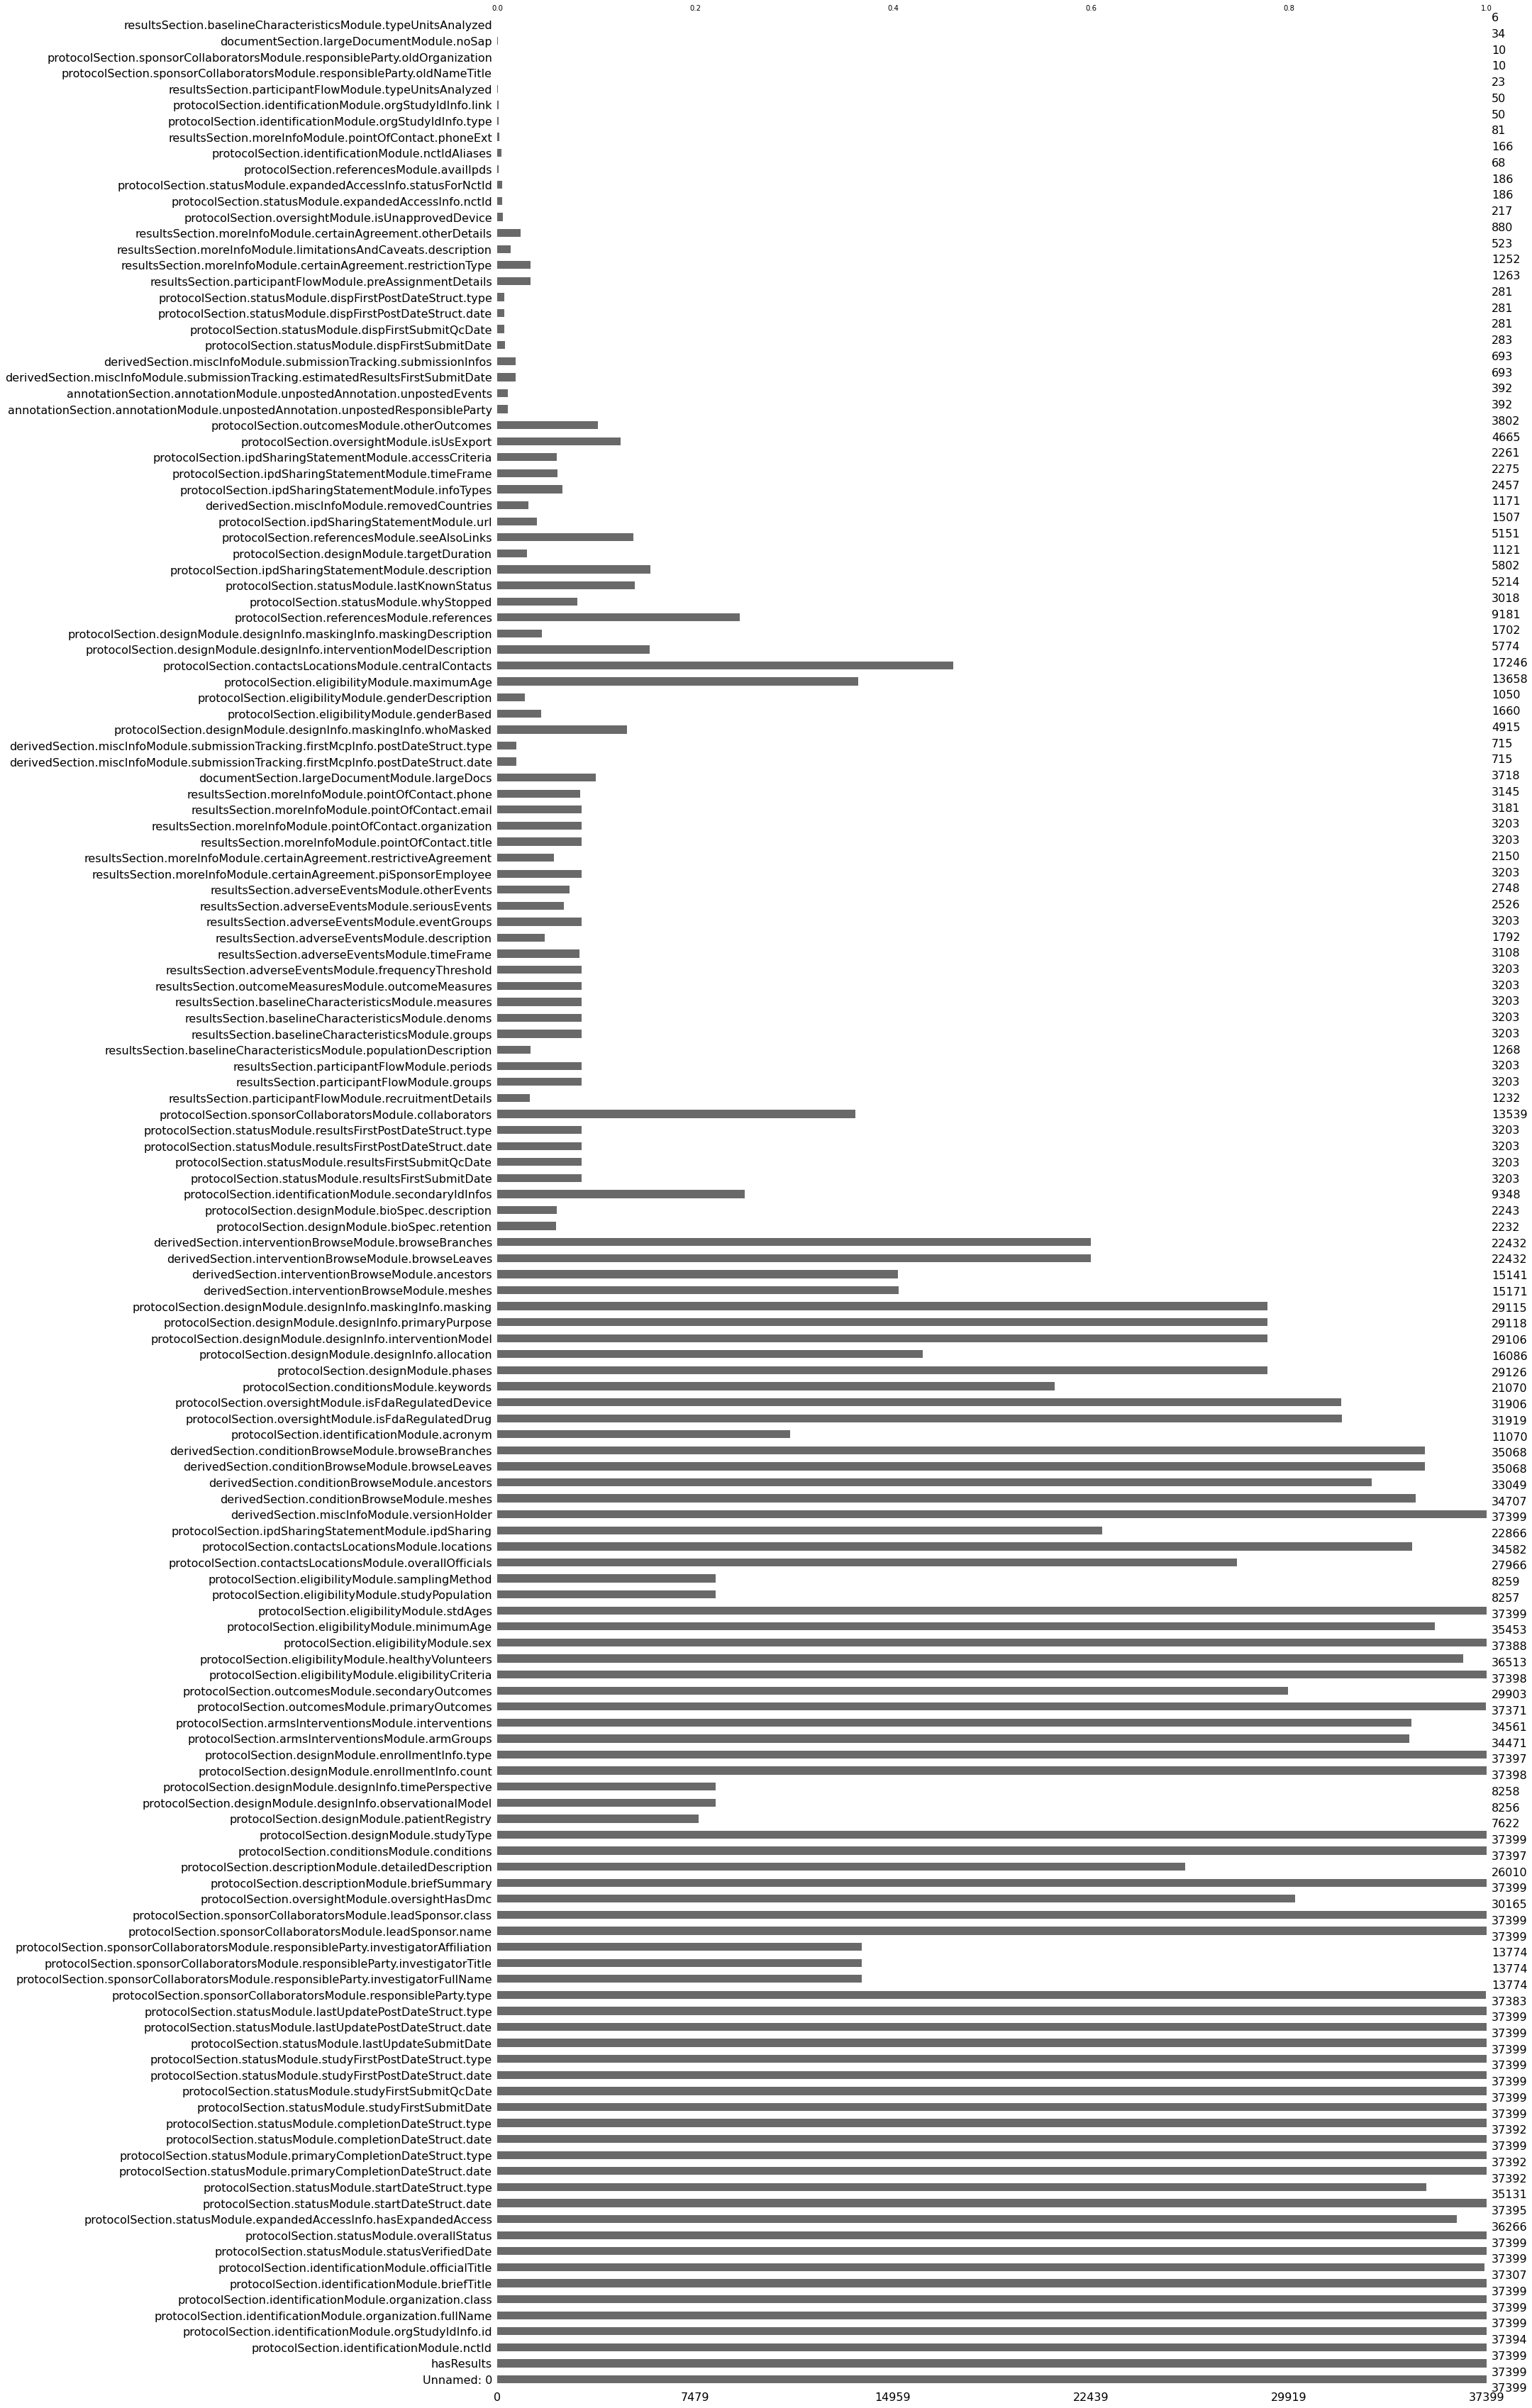

In [13]:
import missingno as msno
msno.bar(df)